In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# 109. Dealing with Outliers

In [2]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=43):
    
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
    sample_ages = np.round(sample_ages, decimals=0)
    
    return sample_ages

In [3]:
sample = create_ages()

In [4]:
sample

array([53., 38., 45., 43., 61., 45., 56., 76., 66., 44., 45., 56., 28.,
       39., 56., 48., 75., 42., 36., 38., 50., 48., 79., 45., 51., 61.,
       49., 57., 55., 61., 32., 61., 48., 52., 45., 72., 23., 68., 41.,
       70., 66., 63., 61., 79., 42., 42., 41., 62., 33., 63., 46., 36.,
       36., 40., 31., 57., 61., 62., 42., 54., 50., 59., 56., 51., 26.,
       48., 51., 41., 47., 33., 46., 57., 77., 37., 50., 38., 49., 47.,
       61., 63., 52., 49., 65., 52., 70., 29., 73., 42., 36., 49., 35.,
       57., 44., 54., 37., 47., 51., 48., 71., 58.])

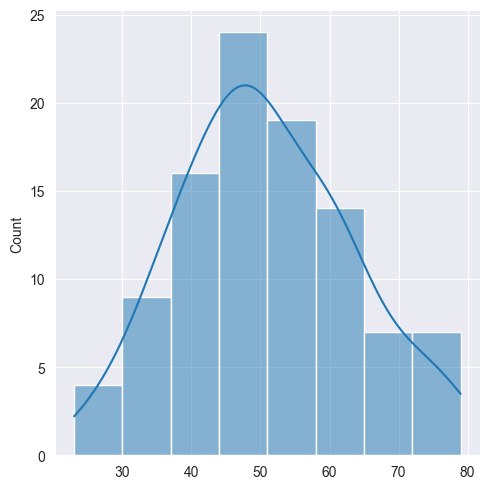

In [5]:
sns.displot(sample, kde=True)

<Axes: >

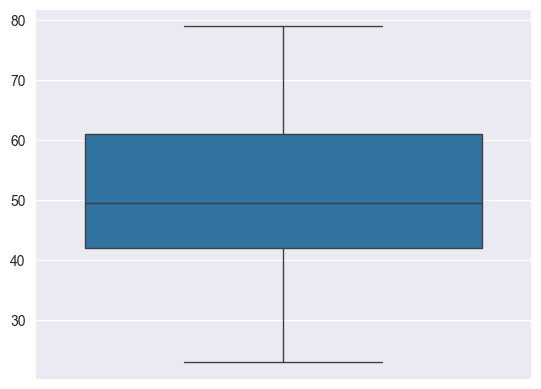

In [6]:
sns.boxplot(sample)

In [7]:
ser = pd.Series(sample)

In [8]:
ser.describe()

count    100.000000
mean      50.810000
std       12.534957
min       23.000000
25%       42.000000
50%       49.500000
75%       61.000000
max       79.000000
dtype: float64

In [9]:
IQR = 55.25 - 42.0

In [10]:
lower_limit = 1.5 * IQR

In [11]:
q75, q25 = np.percentile(ser, [75 ,25])

In [12]:
ipq = q75 - q25

In [13]:
data_path = Path.cwd() / '..' / '..' / 'DATA' / 'Ames_Housing_Data.csv'

In [14]:
df = pd.read_csv(data_path)

In [15]:
df_int = df.select_dtypes(include=['int'])

In [16]:
df_int.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
2nd Flr SF         0.269373
Lot Area           0.266549
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
Misc Val          -0.015691
Yr Sold           -0.030569
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0.119814
Enclosed Porch    -0.128787
PID               -0.246521
Name: SalePrice, dtype: float64

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

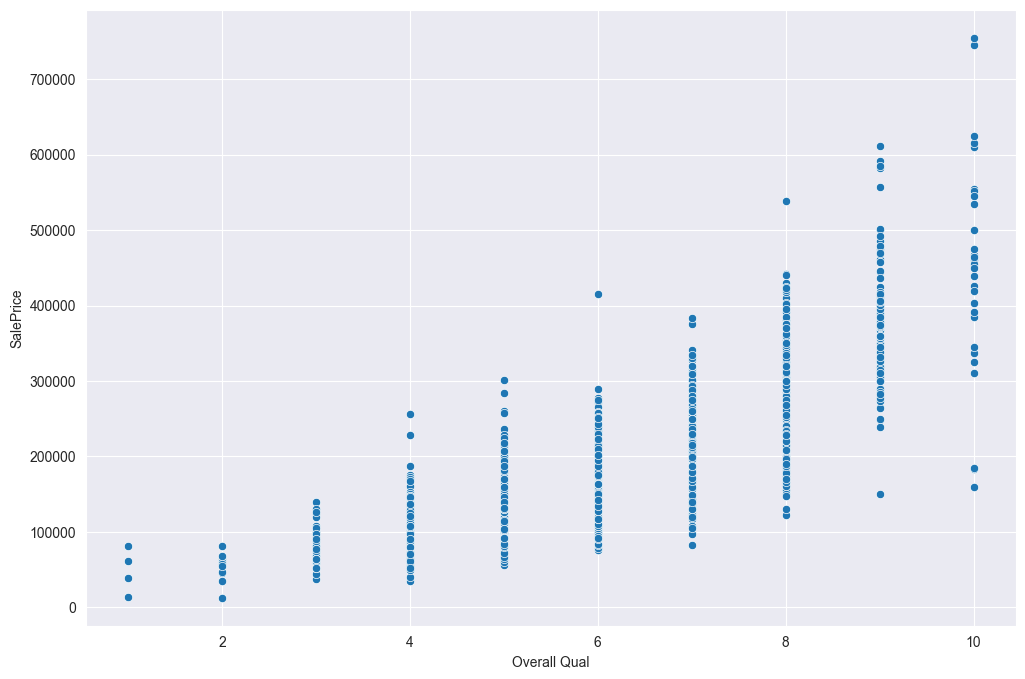

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

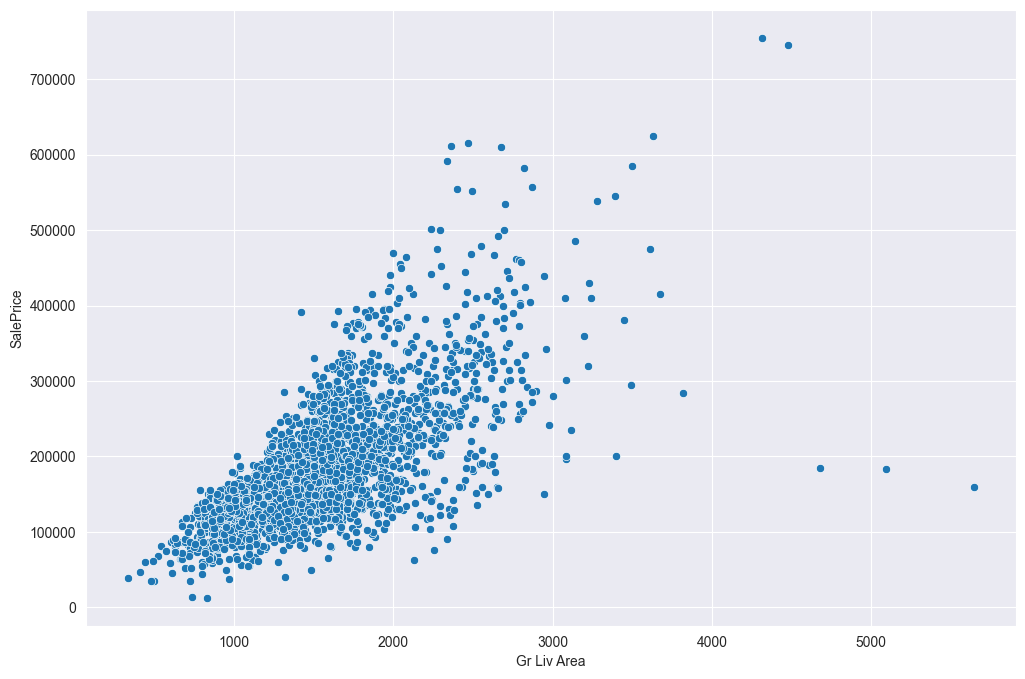

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

In [19]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [20]:
drop_index = df[(df['Gr Liv Area'] > 4_000) & (df['SalePrice'] < 400_000)].index
df[(df['Gr Liv Area'] > 4_000) & (df['SalePrice'] < 400_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

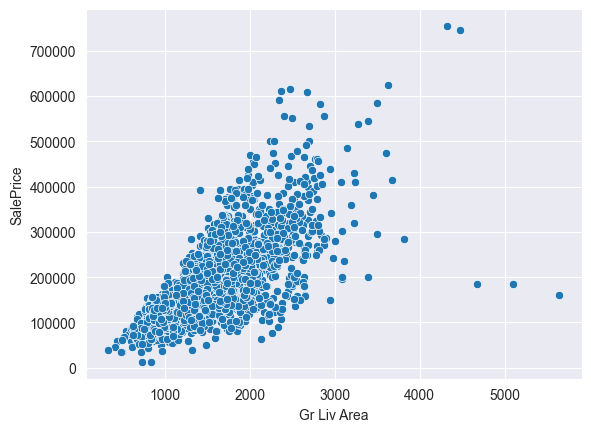

In [21]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [22]:
df_path = Path.cwd() / '..' / '..' / 'DATA' / 'Ames_outliers_removed.csv'

df = pd.read_csv(df_path)

# 110. Dealing with Missing Data : Part One - Evaluation of Missing Data

In [23]:
with open(Path().cwd() / '..' / '..' / 'DATA' / 'Ames_Housing_Feature_Description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [24]:
df = pd.read_csv(df_path)

In [25]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [27]:
df = df.drop(columns='PID', axis=1)

In [28]:
len(df.columns)

80

In [29]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [30]:
df.isnull().sum() > 0

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 80, dtype: bool

In [31]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [32]:
def perecnt_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [33]:
percent_nan = perecnt_missing(df)

In [34]:
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

In [35]:
plt.figure(figsize=(12, 8))

palette = sns.color_palette('Paired', n_colors=len(percent_nan))

<Figure size 1200x800 with 0 Axes>

/var/folders/l7/_s3xsc4557x6v1thb6qhs0m40000gn/T/ipykernel_7516/1572280720.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index, y=percent_nan, palette=palette)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Cars'),
  Text(2, 0, 'BsmtFin SF 1'),
  Text(3, 0, 'Garage Area'),
  Text(4, 0, 'BsmtFin SF 2'),
  Text(5, 0, 'Bsmt Unf SF'),
  Text(6, 0, 'Total Bsmt SF'),
  Text(7, 0, 'Bsmt Half Bath'),
  Text(8, 0, 'Bsmt Full Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Bsmt Qual'),
  Text(11, 0, 'Bsmt Cond'),
  Text(12, 0, 'BsmtFin Type 1'),
  Text(13, 0, 'BsmtFin Type 2'),
  Text(14, 0, 'Bsmt Exposure'),
  Text(15, 0, 'Garage Type'),
  Text(16, 0, 'Garage Qual'),
  Text(17, 0, 'Garage Cond'),
  Text(18, 0, 'Garage Yr Blt'),
  Text(19, 0, 'Garage Finish'),
  Text(20, 0, 'Lot Frontage'),
  Text(21, 0, 'Fireplace Qu'),
  Text(22, 0, 'Mas Vnr Type'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

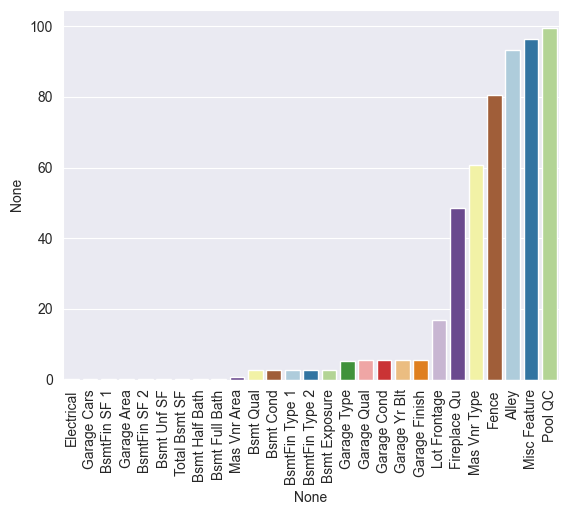

In [36]:
sns.barplot(x=percent_nan.index, y=percent_nan, palette=palette)
plt.xticks(rotation=90)

# 111. Dealing with Missing Data : Part Two - Filling or Dropping data based on Rows

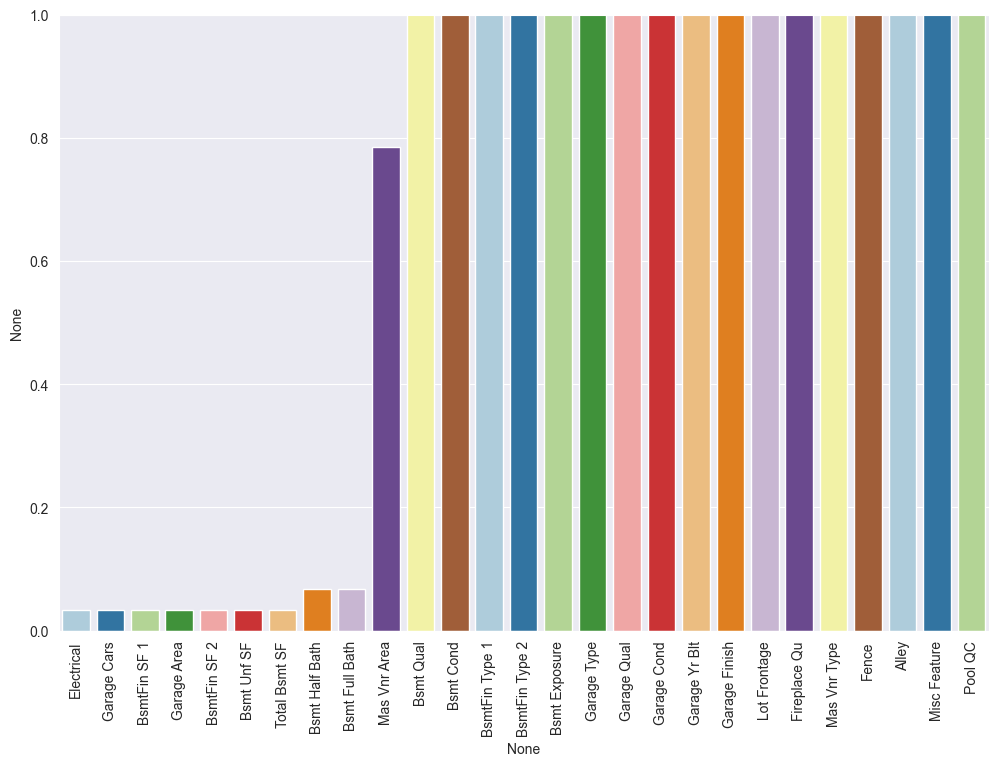

In [37]:
plt.figure(figsize=(12, 8))

sns.barplot(x=percent_nan.index, y=percent_nan, palette=palette, hue=percent_nan.index, legend=False)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.legend([], [], frameon=False)

In [38]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [39]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [40]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

(0.0, 1.0)

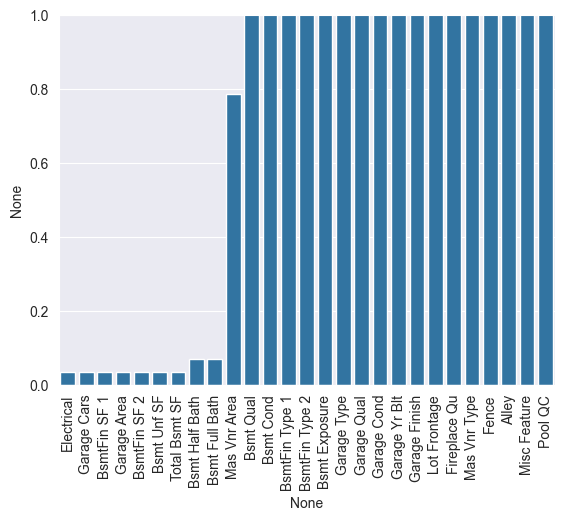

In [41]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 1)


In [43]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [44]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)
percent_nan = percent_missing(df)

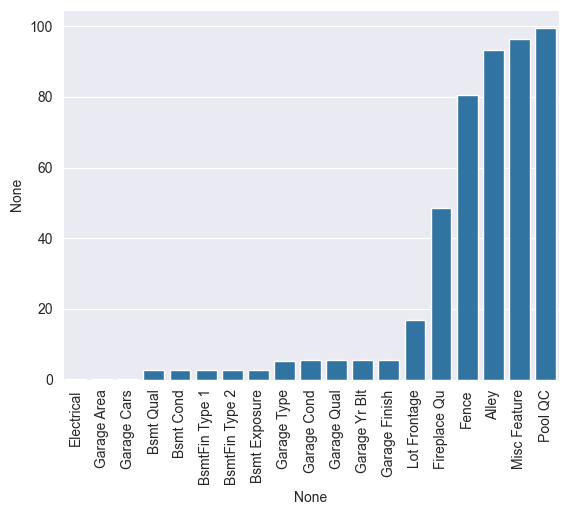

In [45]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# 112. Dealing with Missing Data : Part 3 - Fixing data based on Columns